<a href="https://colab.research.google.com/github/jeraldflowers/Clustering-Scikit-learn/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering with scikit-learn


## Import libraries and Test data load 

In [3]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

In [6]:
df_blobs = pd.DataFrame({
    'x1': x[:,0],
    'x2': x[:,1],
    'y': y
})

In [7]:
df_blobs

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [11]:
def plot_2d_clusters(x, y, ax):
  y_uniques = pd.Series(y).unique()

  for _ in y_uniques:
    x[y==_].plot(
        title=f'{len(y_uniques)} Clusters',
        kind='scatter',
        x='x1',
        y='x2',
        marker=f'${_}$',
        ax = ax
    )

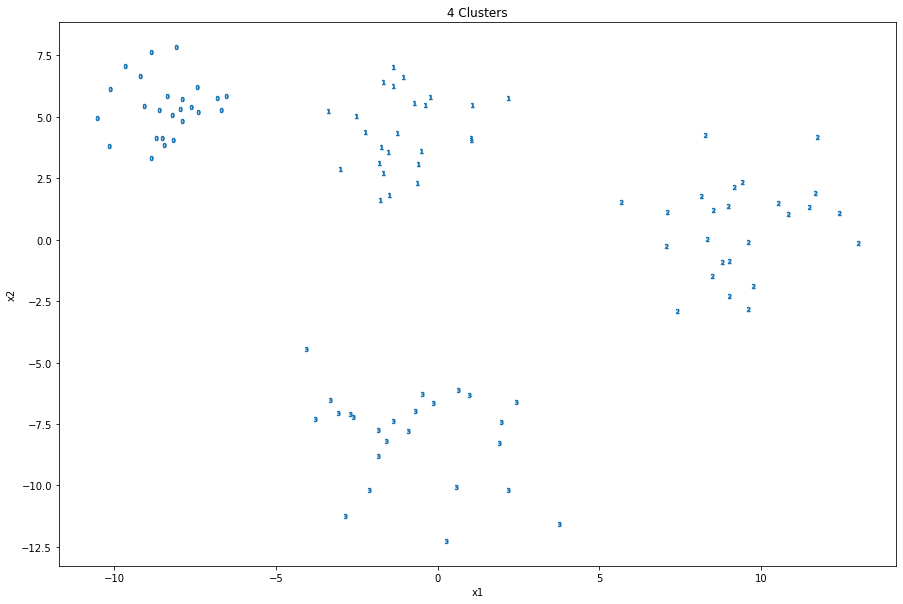

In [12]:
fig, ax = plt.subplots(1,1, figsize=(15, 10))
x, y = df_blobs[['x1', 'x2']], df_blobs['y']
plot_2d_clusters(x, y, ax)

## Applying Clustering

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=4, random_state=7)

In [17]:
y_pred = kmeans.fit_predict(x)

Text(0.5, 1.0, 'Kmeans 4 Clusters')

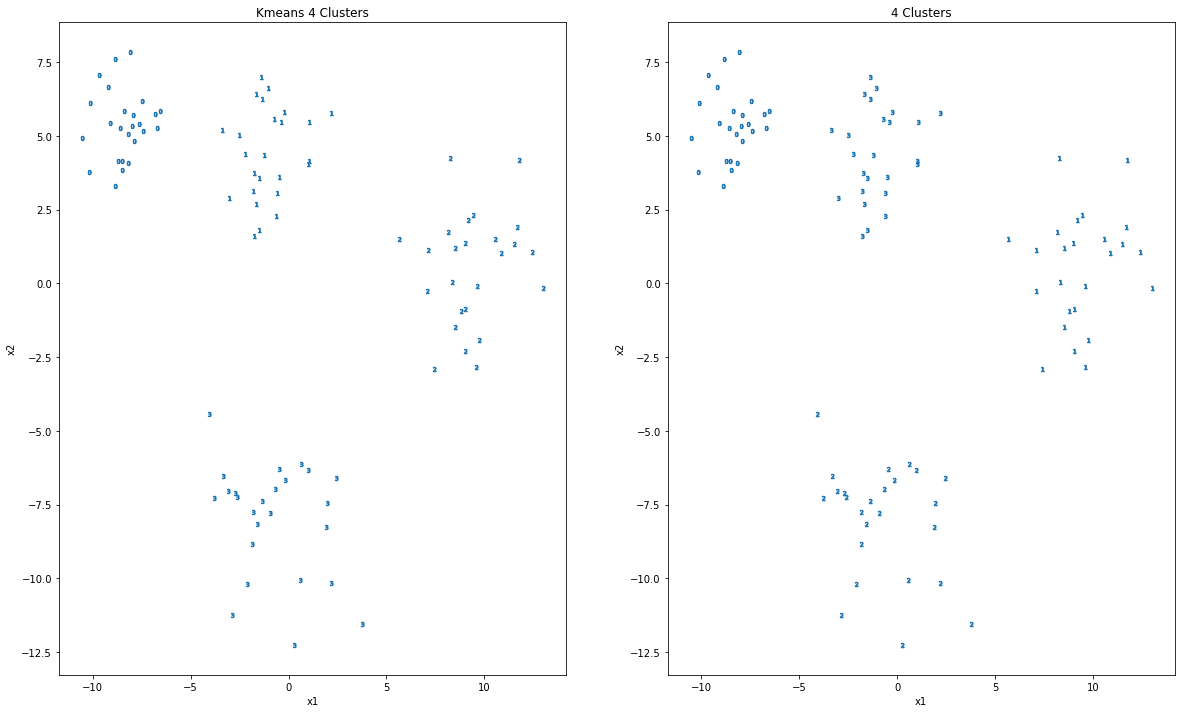

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20, 12))
plot_2d_clusters(x, y, axs[0])
plot_2d_clusters(x, y_pred, axs[1])
                 
axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[0].set_title(f'Kmeans {axs[1].get_title()}')
